## Case study for Flywheel Associate Data Scientist Position

In [1]:
import pandas as pd

#### Import the notebook as a pandas DataFrame

In [76]:
df = pd.read_csv('case_study_junior_ds.csv')
df.head()

,keyword_id,keyword_rank,date,searches,search_engine
0,338145,25218,2022-07-08,53000,0
1,366846,906743,2022-07-08,0,0
2,8590017696,136761,2022-07-08,7000,0
3,8590268435,60380,2022-07-08,20033,0
4,17179954797,239930,2022-07-08,2000,0


### First, I checked to see which keyword_id values had more than one search engine

This query shows, that none have more than one

In [184]:
df[df.groupby('keyword_id')['search_engine'].transform('nunique').ne(1)] # shows rows where the number of unique search engines per keyword_id is not 1

,keyword_id,keyword_rank,date,searches,search_engine


### Next, I tried to make sense of the ranks within keyword_rank

Through obsevation, 3 was the highest rank in an ascending order, so we chose to compare the searches between the first row within this attribute, and the next lowest one, and saw that the latter had more searches. Through this and since neither had rank 1, it was determined that the keyword_rank values were not relevant in the scope of the assignment.

In [133]:
df.loc[df['keyword_rank'] == df['keyword_rank'].min()].iloc[0]['searches'] > df.loc[df['keyword_rank'] == 4].iloc[0]['searches'] #compares the searches within keywords with diferent consecutive keyword_rank

False

With this, based on what is given and what is asked, it is not completely clear whether the goal is to get a total ranking for the keywords accross all search engines, or to rank the most searched keywords for each search engine. In a real world situation, I would first make sure to clarify this with the client or my supervisor before moving forward, but in this case I will do both and present my findings.

In [185]:
df_new = df.set_index(['search_engine','keyword_id']) 
df_new = df_new.sort_values(by=['search_engine','searches'], ascending=False) # with a changed index, sorts within each search_engine group
df_new

keyword_rank        date  searches
search_engine keyword_id                                       
25            3212635610681            13  2022-07-10   5180843
              3212635610681            15  2022-07-11   3996588
              1786706503924            49  2022-07-10   2106210
              1786706503924            44  2022-07-11   1836285
              249108175443             71  2022-07-10   1608839
...                                   ...         ...       ...
0             4045859481869       3010749  2022-07-14         0
              4105988980748       1057057  2022-07-14         0
              4123168799448      10844277  2022-07-14         0
              4157528385135       3659554  2022-07-14         0
              4260607871344       1041556  2022-07-14         0

[469308 rows x 3 columns]

### Most searches of the highest ranked keyword for each search engine

The following cell sorts the keywords based on descending order of searches for each engine, then creates a ranking based on the same order. Finally, only the keywords with the highest rank of 1 are shown, eliminating irrelevant attributes to the solution, for a cleaner view.

In [187]:
df_new = df_new.sort_values(by=['search_engine','searches'], ascending=False) # Sort the values in descending order from most to least searches within a search engine
df_new['Rank_search_engine'] = df_new.groupby(['search_engine'])['searches'].rank(ascending=False).sub(0).astype(int) # assign ranks based on the number of searches within that search engine
df_rank1 = df_new.loc[df_new['Rank_search_engine'] == 1] # show all keywords with rank 1 in their respective search engines
df_rank1 = df_rank1.drop(columns=['keyword_rank','date'])
df_rank1

,,searches,Rank_search_engine
search_engine,keyword_id,,
25,3212635610681,5180843,1
24,3135326202085,3980378,1
23,3212635922861,25458,1
22,901943359773,297633,1
21,2628520089616,321482,1
20,566935803928,176730,1
19,120259234373,3814478,1
18,188978789894,1622629,1
17,4063039262733,104000,1


The keyword one with the most searches is:

In [137]:
df_rank1.loc[df_rank1['searches'] == df_rank1['searches'].max()]

,,keyword_rank,date,searches,Rank_search_engine
search_engine,keyword_id,,,,
11,910533449676,22,2022-07-11,18637157,1


### Bar plot of the highest ranked keywords

The following bar plot shows the most searched keywords in each search engine

<Axes: xlabel='Search Engine', ylabel='Searches'>

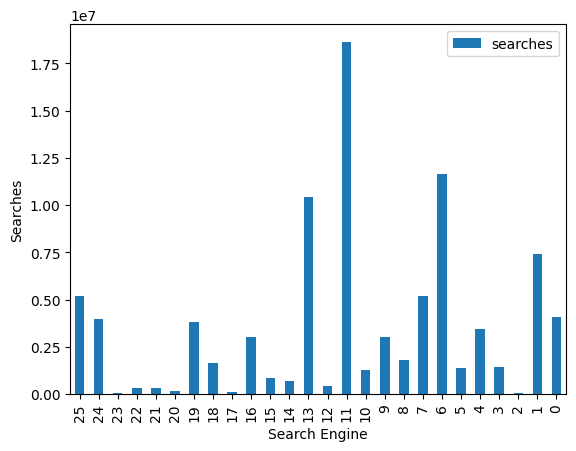

In [188]:
df_rank1 = df_rank1.reset_index('keyword_id') # reseting index to only inclue the search engine for cleaner plotting
df_rank1.plot(kind='bar',y='searches',use_index=True, ylabel='Searches', xlabel= 'Search Engine') # plot using pandas built in method

### Alternative version

In the unlikely case that what is sought is the keyword_id with the most searches in total over the entire dataset, the ranking is done as follows.

In [182]:
df_new = df.groupby(by=['keyword_id','search_engine']).sum() # Group by both the id and search engine, and summing all other values of which the searches is the only relevant one.
df_new = df_new.sort_values(by=['searches'], ascending=False) # Sort the values in descending order from most to least searches
df_new['Rank_total'] = df_new['searches'].rank(ascending=False).sub(0).astype(int) # reassign ranks based on the number of searches.
df_new

,,keyword_rank,date,searches,Rank_total
keyword_id,search_engine,,,,
910533449676,11,256,2022-07-082022-07-092022-07-102022-07-112022-0...,50026868,1
1073742334476,6,215,2022-07-082022-07-092022-07-102022-07-112022-0...,33569733,2
1554778255514,13,22,2022-07-082022-07-092022-07-102022-07-112022-0...,29706897,3
2018634669408,6,877,2022-07-082022-07-092022-07-102022-07-112022-0...,21324786,4
704374905883,1,593,2022-07-082022-07-092022-07-102022-07-112022-0...,19481897,5
...,...,...,...,...,...
1795296452139,4,3728002,2022-07-08,0,81263
1795296452378,4,3190709,2022-07-082022-07-112022-07-12,0,81263
1795296452383,4,4686066,2022-07-14,0,81263


In [70]:
print('For its only search engine, the keyword with rank 1, ', df_new.index[0][0] , ', had ', df_new.iloc[0]['searches'],' searches in search engine ', df_new.index[0][1],'.')

For its only search engine, the keyword with rank 1,  910533449676 , had  50026868  searches in search engine  11 .


For all other search engines, keyword with the id '910533449676' had zero searches. This is not shown in the table, or visualized in a plot because the scale difference in the values is too big for satisfying visualization, and the difference is clear enough in the current format.

### Conclusions

Based on the observations gathered while working with the dataset, as well as the context and wording provided in the assignment sheet, it is clear that there is some missing information both about the data set and meaning for the column 'keyword_rank' and what the ranking should be based on exactly. As previously stated, in a real life scenario, I would simply ask for clarification, but in this case chose to deal with both of the scenarios that seemed most plausible to me, and giving more weight to the first scenario, which provides much more insight into dataset. 

One hypothesis as the meaning of the keyword_rank values is that it is ranking keywords based on the occurence of the word in a search. Meaning that it migh give more weight to those that are repeated within a single search. This, however, is hard to prove without more data. 

For this assignment, I determined that pandas had more than enough to succeed and also keep it simple.